In [1]:
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
sys.path.append('/content/drive/MyDrive/Demand_Analytics/ProvisionalDataset/data')
os.chdir('/content/drive/MyDrive/Demand_Analytics/ProvisionalDataset/data')

Mounted at /content/drive


In [3]:
df=pd.read_csv('data.csv',encoding='latin1')
df.columns=[i.lower() for i in pd.read_csv('data.csv',nrows=0).columns]

# df.loc[:,'invoicedate']=pd.to_datetime(df.invoicedate)

# df.loc[:,'year_month']=df.invoicedate.dt.to_period('M')
# df.loc[:,'week']=df.invoicedate.dt.to_period('W')

display(df.head(2))
df.shape

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


(541909, 8)

In [4]:
def generate_dt_periods(data,date_col_str='invoicedate',
                        label='weekly',frequency='W'):
  df=data.copy()
  if not (np.issubdtype(df.loc[:,date_col_str], np.datetime64)):
    df.loc[:,date_col_str]=pd.to_datetime(df.loc[:,date_col_str])
  
  df.loc[:,label]=df.invoicedate.dt.to_period(frequency)
  return df

df=generate_dt_periods(data=df)
df=generate_dt_periods(data=df,date_col_str='invoicedate',
                        label='daily',frequency='D')
df=generate_dt_periods(data=df,date_col_str='invoicedate',
                        label='hourly',frequency='H')
df=generate_dt_periods(data=df,date_col_str='invoicedate',
                        label='year_month',frequency='M')

In [5]:
########## Sampling of Price 
def generateSampleUnit(df,parent_col='description',
                       unit_col='unitprice',dt_col='invoicedate',frequency='7D'):
  if not (np.issubdtype(df.loc[:,dt_col], np.datetime64)):
    df.loc[:,dt_col]=pd.to_datetime(df.loc[:,dt_col])
  
  df_p=df.groupby([parent_col,
                  pd.Grouper(key=dt_col,freq=frequency)])[[unit_col]].mean().unstack()[unit_col]
  df_original=df_p.copy()
  
  df_p.loc[:,'ct_unit']=df_p.notna().sum(axis=1)

  df_p.loc[:,'mean_unit']=df_p.mean(axis=1)
  cols_added=[i for i in df_p.columns if i not in df_original.columns]

  return (df_p,cols_added)
############# RankGenerator
def rankGenerator(df_p,cols_tbu=['ct_price','mean_price']):
  temp_df=df_p.sort_values(by=cols_tbu,ascending=False)
  # temp_df.reset_index()
  temp_df.loc[:,'rk']=np.arange(temp_df.shape[0])+1
  return temp_df['rk']

# Price based Ranking

In [6]:
lt_freq=list(reversed(['1D','3D','7D','15D','1M','3M','6M']))#Check rank consistency with increase in sampling frequency
f=lt_freq[0]
df_p_rk=pd.DataFrame(columns=lt_freq,index=df['description'].unique())


for f in lt_freq:
  df_p,cols_added=generateSampleUnit(df,parent_col='description',
                        unit_col='unitprice',dt_col='invoicedate',frequency=f)
  df_p_rk.loc[:,f]=rankGenerator(df_p,cols_tbu=cols_added)

cols_added

['ct_unit', 'mean_unit']

In [7]:
df_p_rk#.mean(axis=1).sort_values()[1:20]
df_p_rk.sort_values('1D')[:30]#1D resembles that the demand consistency is very frequent across all days and 6M tells primarily about price

,6M,3M,1M,15D,7D,3D,1D
WHITE HANGING HEART T-LIGHT HOLDER,866.0,722.0,393.0,247.0,38.0,8.0,1.0
JUMBO BAG RED RETROSPOT,1151.0,986.0,514.0,314.0,49.0,11.0,2.0
REGENCY CAKESTAND 3 TIER,68.0,57.0,23.0,15.0,4.0,1.0,3.0
ASSORTED COLOUR BIRD ORNAMENT,1489.0,1281.0,726.0,442.0,69.0,17.0,4.0
LUNCH BAG RED RETROSPOT,1245.0,1076.0,593.0,366.0,59.0,13.0,5.0
PACK OF 72 RETROSPOT CAKE CASES,2103.0,1814.0,1048.0,636.0,100.0,19.0,6.0
NATURAL SLATE HEART CHALKBOARD,721.0,623.0,345.0,221.0,34.0,7.0,7.0
PARTY BUNTING,339.0,276.0,158.0,109.0,22.0,5.0,8.0
JAM MAKING SET WITH JARS,442.0,364.0,213.0,144.0,25.0,23.0,9.0
RECIPE BOX PANTRY YELLOW DESIGN,719.0,611.0,337.0,216.0,33.0,26.0,10.0


# Demand Based Ranking


In [16]:
lt_freq=list(reversed(['1D','3D','7D','15D','1M','3M','6M']))#Check rank consistency with increase in sampling frequency
f=lt_freq[0]
df_q_rk=pd.DataFrame(columns=lt_freq,index=df['description'].unique())


for f in lt_freq:
  df_q,cols_added=generateSampleUnit(df,parent_col='description',
                        unit_col='quantity',dt_col='invoicedate',frequency=f)
  df_q_rk.loc[:,f]=rankGenerator(df_q,cols_tbu=cols_added)



In [17]:
df_q_rk

,6M,3M,1M,15D,7D,3D,1D
WHITE HANGING HEART T-LIGHT HOLDER,257.0,231.0,159.0,107.0,25.0,4.0,1.0
WHITE METAL LANTERN,1103.0,1059.0,1337.0,834.0,596.0,430.0,405.0
CREAM CUPID HEARTS COAT HANGER,871.0,803.0,568.0,410.0,318.0,371.0,421.0
KNITTED UNION FLAG HOT WATER BOTTLE,857.0,940.0,773.0,516.0,232.0,391.0,354.0
RED WOOLLY HOTTIE WHITE HEART.,615.0,719.0,716.0,477.0,718.0,700.0,624.0
...,...,...,...,...,...,...,...
????damages????,4177.0,4177.0,4177.0,4177.0,4177.0,4177.0,4177.0
mixed up,4162.0,4163.0,4163.0,4163.0,4163.0,4163.0,4163.0
lost,4201.0,4201.0,4201.0,4201.0,4201.0,4201.0,4201.0
CREAM HANGING HEART T-LIGHT HOLDER,3600.0,3764.0,3884.0,3905.0,3933.0,3945.0,3788.0


# Weighted SUM for Ranking across samplimng frequencies

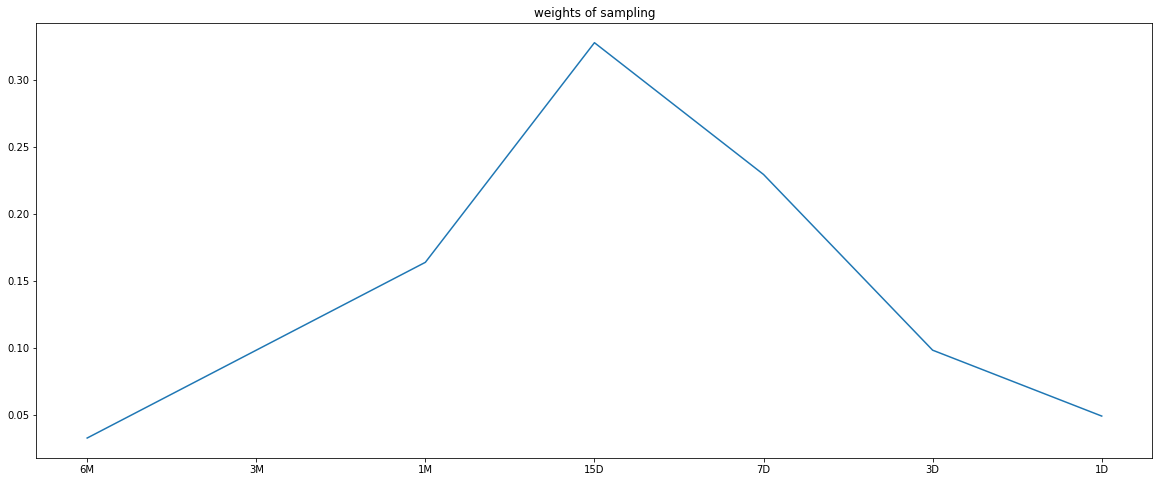

In [10]:
s_wt=pd.Series(np.array([1,3,5,10,7,3,1.5]),
                        index=list(reversed(['1D','3D','7D','15D','1M','3M','6M']))
                )   
s_wt=s_wt/s_wt.sum()
s_wt.plot(figsize=(20,8),title='weights of sampling')

In [19]:
df_q_rk.loc[:,'weighted_rank']=(df_q_rk*s_wt).sum(axis=1)
df_q_rk.dropna(axis=0,inplace=True)
df_q_rk.sort_values('weighted_rank')

,6M,3M,1M,15D,7D,3D,1D,weighted_rank
PACK OF 12 LONDON TISSUES,23.0,17.0,13.0,5.0,1.0,85.0,120.0,20.688525
PACK OF 72 RETROSPOT CAKE CASES,72.0,78.0,56.0,27.0,4.0,1.0,5.0,29.327869
ASSORTED COLOUR BIRD ORNAMENT,117.0,95.0,61.0,41.0,8.0,2.0,4.0,38.852459
VICTORIAN GLASS HANGING T-LIGHT,142.0,118.0,77.0,46.0,11.0,20.0,16.0,49.245902
PACK OF 72 SKULL CAKE CASES,103.0,99.0,78.0,38.0,10.0,62.0,52.0,49.311475
...,...,...,...,...,...,...,...,...
"mouldy, thrown away.",4219.0,4219.0,4219.0,4219.0,4219.0,4219.0,4219.0,4219.000000
wrongly marked. 23343 in box,4220.0,4220.0,4220.0,4220.0,4220.0,4220.0,4220.0,4220.000000
throw away,4221.0,4221.0,4221.0,4221.0,4221.0,4221.0,4221.0,4221.000000
Printing smudges/thrown away,4222.0,4222.0,4222.0,4222.0,4222.0,4222.0,4222.0,4222.000000


In [20]:
df_p_rk.loc[:,'weighted_rank']=(df_p_rk*s_wt).sum(axis=1)
df_p_rk.dropna(axis=0,inplace=True)

df_p_rk.sort_values('weighted_rank')

,6M,3M,1M,15D,7D,3D,1D,weighted_rank
POSTAGE,21.0,18.0,7.0,5.0,3.0,20.0,37.0,9.721311
REGENCY CAKESTAND 3 TIER,68.0,57.0,23.0,15.0,4.0,1.0,3.0,17.688525
DOTCOM POSTAGE,2.0,2.0,2.0,2.0,1.0,133.0,151.0,21.983607
Manual,3.0,3.0,1.0,1.0,2.0,114.0,194.0,22.098361
RED RETROSPOT CAKE STAND,82.0,65.0,26.0,17.0,5.0,41.0,83.0,28.180328
...,...,...,...,...,...,...,...,...
wrongly marked. 23343 in box,4219.0,4219.0,4219.0,4219.0,4219.0,4219.0,4219.0,4219.000000
wrongly sold (22719) barcode,4220.0,4220.0,4220.0,4220.0,4220.0,4220.0,4220.0,4220.000000
wrongly sold as sets,4221.0,4221.0,4221.0,4221.0,4221.0,4221.0,4221.0,4221.000000
wrongly sold sets,4222.0,4222.0,4222.0,4222.0,4222.0,4222.0,4222.0,4222.000000


# Final Product Selection 
## Data Generation

In [105]:
#Right now the entire df is being used
## we will partition this df in months/seasons and will check for consistency of substitutive effect

final_products=list(set(df_q_rk.sort_values('weighted_rank')[:15].index
                      ).union(set(df_p_rk.sort_values('weighted_rank')[:1].index))
                    )

df_quantity_final,_=generateSampleUnit(df,parent_col='description',
                        unit_col='quantity',dt_col='invoicedate',frequency='7D')#we can provide different partitions of df to perform regresssion analysis on different sections of data
df_price_final,_=generateSampleUnit(df,parent_col='description',
                        unit_col='unitprice',dt_col='invoicedate',frequency='7D')

final_products


['WORLD WAR 2 GLIDERS ASSTD DESIGNS',
 'PLACE SETTING WHITE HEART',
 'PACK OF 12 TRADITIONAL CRAYONS',
 'PACK OF 12 LONDON TISSUES ',
 '60 TEATIME FAIRY CAKE CASES',
 'PACK OF 72 SKULL CAKE CASES',
 'JUMBO BAG RED RETROSPOT',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'CHARLOTTE BAG SUKI DESIGN',
 'PACK OF 72 RETROSPOT CAKE CASES',
 'PACK OF 60 PINK PAISLEY CAKE CASES',
 'VICTORIAN GLASS HANGING T-LIGHT',
 'MINI PAINT SET VINTAGE ',
 'POSTAGE',
 'RED  HARMONICA IN BOX ',
 'PACK OF 60 DINOSAUR CAKE CASES']

# Regression Analysis

In [104]:
final_products=[i for i in final_products if type(i)==str]

final_products=[i for i in final_products if len(i.split())>=2]
print(len(final_products))
df_q_tbu=df_quantity_final.loc[final_products,[i for i in df_quantity_final.columns if '_q' not in str(i)]].T
df_p_tbu=df_price_final.loc[final_products,[i for i in df_price_final.columns if '_' not in str(i)]].T

0


In [45]:
final_products=[i.capitalize().strip().replace(' ','_').lower() for i in final_products]
df_q_tbu.columns=[i.capitalize().strip().replace(' ','_').lower()+'__demand' for i in df_q_tbu.columns]
df_p_tbu.columns=[i.capitalize().strip().replace(' ','_').lower()+'__price' for i in df_p_tbu.columns]
df_tbu=df_q_tbu.merge(df_p_tbu,right_index=True,left_index=True)

# sorted(df_p_tbu.index)==sorted(df_q_tbu.index)
df_tbu.shape


(54, 30)

In [46]:
from collections import defaultdict
from sklearn.linear_model import LinearRegression
import seaborn as sns

dict_betas=defaultdict(dict)
for temp_product in final_products:

  y_col=temp_product+'__demand'
  xx=df_tbu.drop([y_col],axis=1)
  xx=xx.loc[:,[i for i in xx.columns if '_price'in i ]]
  # xx=xx.fillna(xx.mean())
  # xx=xx[xx>0]  
  xx.dropna(axis=0,inplace=True)
  xx=np.log(xx)
  
  yy=np.log(df_tbu[y_col])
  # yy=yy.fillna(yy.mean())
  yy=yy.loc[xx.index]

  lr=LinearRegression()
  lr.fit(xx,yy)

  temp_beta={i:j for i,j in zip(list(xx.columns),lr.coef_)}
  dict_betas[y_col]=temp_beta


df_priceSensitivity=pd.DataFrame(dict_betas).sort_values(by=y_col)#.loc['charlotte_bag_suki_design__price']


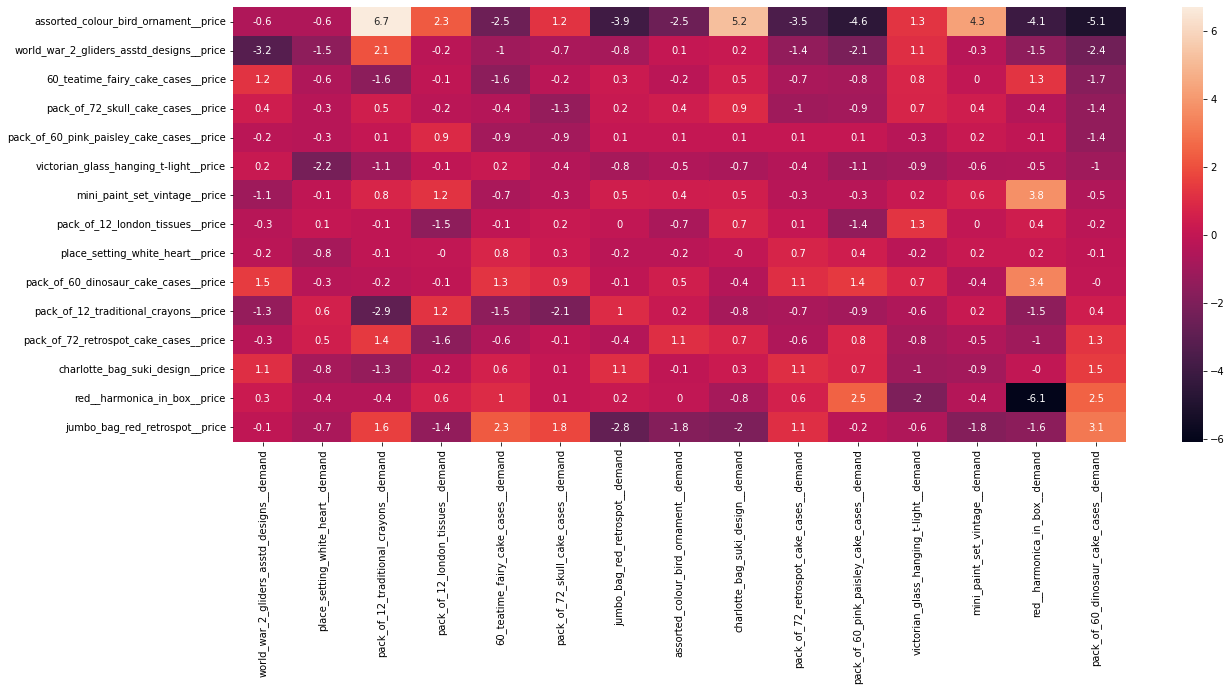

In [47]:
plt.figure(figsize=(20,8))
sns.heatmap(df_priceSensitivity.round(1),annot=True)

## Selection of top quantile susbtitutive products 

In [48]:
# df_priceSensitivity.T > 
df_priceSensitivity=df_priceSensitivity.sort_index(axis=1).sort_index()#.shape
df_priceSensitivity=pd.DataFrame((df_priceSensitivity.values+df_priceSensitivity.T.values)/2,
columns=df_priceSensitivity.columns,index=df_priceSensitivity.index)# Depends on whether if A is substitue of B then B is substitute of A

df_priceSensitivity.T.apply(np.quantile,q=0.9,axis=1)

df_mask=df_priceSensitivity.T.apply(lambda x: (x>np.quantile(x,q=0.85)) & x>0
,axis=1)
beta_weekly=df_mask.apply(lambda s : pd.Series(s[s==True].index),axis=1)#[0]

In [49]:
beta_weekly

,0,1,2
60_teatime_fairy_cake_cases__demand,charlotte_bag_suki_design__price,jumbo_bag_red_retrospot__price,red__harmonica_in_box__price
assorted_colour_bird_ornament__demand,charlotte_bag_suki_design__price,mini_paint_set_vintage__price,pack_of_12_traditional_crayons__price
charlotte_bag_suki_design__demand,assorted_colour_bird_ornament__price,pack_of_72_retrospot_cake_cases__price,world_war_2_gliders_asstd_designs__price
jumbo_bag_red_retrospot__demand,60_teatime_fairy_cake_cases__price,pack_of_12_traditional_crayons__price,pack_of_60_dinosaur_cake_cases__price
mini_paint_set_vintage__demand,assorted_colour_bird_ornament__price,mini_paint_set_vintage__price,red__harmonica_in_box__price
pack_of_12_london_tissues__demand,assorted_colour_bird_ornament__price,mini_paint_set_vintage__price,pack_of_12_traditional_crayons__price
pack_of_12_traditional_crayons__demand,assorted_colour_bird_ornament__price,jumbo_bag_red_retrospot__price,pack_of_12_london_tissues__price
pack_of_60_dinosaur_cake_cases__demand,jumbo_bag_red_retrospot__price,pack_of_72_retrospot_cake_cases__price,red__harmonica_in_box__price
pack_of_60_pink_paisley_cake_cases__demand,charlotte_bag_suki_design__price,pack_of_72_retrospot_cake_cases__price,red__harmonica_in_box__price
pack_of_72_retrospot_cake_cases__demand,charlotte_bag_suki_design__price,pack_of_60_dinosaur_cake_cases__price,place_setting_white_heart__price


# Sensitivity analysis across different seasons

## WInters

In [97]:
final_products=[i for i in final_products if type(i)==str]

final_products=[i for i in final_products if len(i.split())>=2]
print(len(final_products))
df_q_tbu=df_quantity_final.loc[final_products,[i for i in df_quantity_final.columns if '_q' not in str(i)]].T
df_p_tbu=df_price_final.loc[final_products,[i for i in df_price_final.columns if '_' not in str(i)]].T

15


In [98]:
winter_idx=[i for i in df_q_tbu.T.columns[:-2] if i.month in (11,12,1,2)]#Winters
df_p_tbu=df_p_tbu.loc[winter_idx]
df_q_tbu=df_q_tbu.loc[winter_idx]

In [99]:
final_products=[i.capitalize().strip().replace(' ','_').lower() for i in final_products]
df_q_tbu.columns=[i.capitalize().strip().replace(' ','_').lower()+'__demand' for i in df_q_tbu.columns]
df_p_tbu.columns=[i.capitalize().strip().replace(' ','_').lower()+'__price' for i in df_p_tbu.columns]
df_tbu=df_q_tbu.merge(df_p_tbu,right_index=True,left_index=True)

# sorted(df_p_tbu.index)==sorted(df_q_tbu.index)
df_tbu.shape


,world_war_2_gliders_asstd_designs__demand,place_setting_white_heart__demand,pack_of_12_traditional_crayons__demand,pack_of_12_london_tissues__demand,60_teatime_fairy_cake_cases__demand,pack_of_72_skull_cake_cases__demand,jumbo_bag_red_retrospot__demand,assorted_colour_bird_ornament__demand,charlotte_bag_suki_design__demand,pack_of_72_retrospot_cake_cases__demand,...,pack_of_72_skull_cake_cases__price,jumbo_bag_red_retrospot__price,assorted_colour_bird_ornament__price,charlotte_bag_suki_design__price,pack_of_72_retrospot_cake_cases__price,pack_of_60_pink_paisley_cake_cases__price,victorian_glass_hanging_t-light__price,mini_paint_set_vintage__price,red__harmonica_in_box__price,pack_of_60_dinosaur_cake_cases__price
invoicedate,,,,,,,,,,,,,,,,,,,,,
2010-12-01,315.181818,13.818182,9.444444,35.869565,14.307692,14.062500,22.903846,26.100000,30.450000,32.785714,...,0.930000,2.468846,1.770400,1.376000,0.742619,0.914167,1.869444,0.824545,1.579667,0.793333
2010-12-08,49.470588,18.750000,16.153846,16.444444,13.461538,18.083333,11.263158,19.942857,40.941176,22.897436,...,0.935000,2.580526,1.854571,1.228235,0.736667,0.696000,1.522857,0.824545,1.550000,0.696000
2010-12-15,73.916667,14.250000,25.900000,96.000000,48.058824,83.600000,16.290323,18.526316,22.000000,91.263158,...,0.740000,2.732581,1.914211,1.464800,0.918947,0.791176,1.708182,0.890000,1.831765,0.877500
2010-12-22,NaN,NaN,24.000000,12.333333,24.000000,18.250000,0.500000,16.000000,41.333333,24.000000,...,0.945000,2.027500,1.690000,1.360000,0.550000,NaN,1.250000,0.650000,NaN,0.550000
2010-12-29,1.000000,60.000000,24.000000,1.000000,2.000000,1.500000,9.000000,18.000000,1.000000,12.500000,...,0.550000,1.950000,1.690000,0.850000,0.550000,0.550000,1.250000,NaN,2.510000,0.550000
2011-01-05,116.571429,29.400000,15.250000,24.666667,11.611111,24.800000,40.781250,28.923077,21.736842,23.619048,...,0.550000,2.148125,1.796154,1.360526,0.714762,0.764706,1.410500,0.768333,1.226250,0.623000
2011-01-12,32.333333,13.333333,39.750000,9.857143,26.538462,22.500000,7.657895,8.647059,17.722222,23.666667,...,0.625000,3.101579,1.942353,1.370000,0.732857,0.995000,1.793846,0.846000,1.552500,0.680000
2011-01-19,145.000000,32.333333,13.333333,11.444444,18.615385,27.818182,26.028571,30.000000,25.800000,76.884615,...,0.868182,2.504286,1.668182,1.255333,0.787308,0.830833,1.655000,0.650000,1.470000,0.550000
2011-01-26,48.000000,99.142857,32.125000,34.000000,17.052632,12.529412,17.642857,28.666667,18.818182,19.285714,...,0.943529,2.385000,1.716296,1.213636,0.750000,0.716667,1.377500,0.758889,1.250000,0.627778


In [100]:
dict_betas=defaultdict(dict)
for temp_product in final_products:

  y_col=temp_product+'__demand'
  xx=df_tbu.drop([y_col],axis=1)
  xx=xx.loc[:,[i for i in xx.columns if '_price'in i ]]
  # xx=xx.fillna(xx.mean())
  # xx=xx[xx>0]  
  xx.dropna(axis=0,inplace=True)
  xx=np.log(xx)
  
  yy=np.log(df_tbu[y_col])
  # yy=yy.fillna(yy.mean())
  yy=yy.loc[xx.index]

  lr=LinearRegression()
  lr.fit(xx,yy)

  temp_beta={i:j for i,j in zip(list(xx.columns),lr.coef_)}
  dict_betas[y_col]=temp_beta


df_priceSensitivity=pd.DataFrame(dict_betas).sort_values(by=y_col)#.loc['charlotte_bag_suki_design__price']

In [101]:
# df_priceSensitivity.T > 
df_priceSensitivity=df_priceSensitivity.sort_index(axis=1).sort_index()#.shape
df_priceSensitivity=pd.DataFrame((df_priceSensitivity.values+df_priceSensitivity.T.values)/2,
columns=df_priceSensitivity.columns,index=df_priceSensitivity.index)# Depends on whether if A is substitue of B then B is substitute of A

df_priceSensitivity.T.apply(np.quantile,q=0.9,axis=1)

df_mask=df_priceSensitivity.T.apply(lambda x: (x>np.quantile(x,q=0.85)) & x>0
,axis=1)
beta_weekly=df_mask.apply(lambda s : pd.Series(s[s==True].index),axis=1)#[0]

In [102]:
beta_weekly

,0,1,2
60_teatime_fairy_cake_cases__demand,jumbo_bag_red_retrospot__price,mini_paint_set_vintage__price,pack_of_72_retrospot_cake_cases__price
assorted_colour_bird_ornament__demand,charlotte_bag_suki_design__price,mini_paint_set_vintage__price,place_setting_white_heart__price
charlotte_bag_suki_design__demand,assorted_colour_bird_ornament__price,pack_of_60_dinosaur_cake_cases__price,world_war_2_gliders_asstd_designs__price
jumbo_bag_red_retrospot__demand,60_teatime_fairy_cake_cases__price,pack_of_12_traditional_crayons__price,pack_of_60_dinosaur_cake_cases__price
mini_paint_set_vintage__demand,60_teatime_fairy_cake_cases__price,assorted_colour_bird_ornament__price,place_setting_white_heart__price
pack_of_12_london_tissues__demand,pack_of_12_london_tissues__price,pack_of_60_dinosaur_cake_cases__price,pack_of_60_pink_paisley_cake_cases__price
pack_of_12_traditional_crayons__demand,jumbo_bag_red_retrospot__price,mini_paint_set_vintage__price,red__harmonica_in_box__price
pack_of_60_dinosaur_cake_cases__demand,jumbo_bag_red_retrospot__price,pack_of_12_london_tissues__price,red__harmonica_in_box__price
pack_of_60_pink_paisley_cake_cases__demand,jumbo_bag_red_retrospot__price,pack_of_12_london_tissues__price,red__harmonica_in_box__price
pack_of_72_retrospot_cake_cases__demand,60_teatime_fairy_cake_cases__price,jumbo_bag_red_retrospot__price,pack_of_60_dinosaur_cake_cases__price


# Sensitivity analysis across different seasons

## Summers

In [106]:
final_products=[i for i in final_products if type(i)==str]

final_products=[i for i in final_products if len(i.split())>=2]
print(len(final_products))
df_q_tbu=df_quantity_final.loc[final_products,[i for i in df_quantity_final.columns if '_q' not in str(i)]].T
df_p_tbu=df_price_final.loc[final_products,[i for i in df_price_final.columns if '_' not in str(i)]].T

15


In [108]:
summer_idx=[i for i in df_q_tbu.T.columns[:-2] if i.month in (3,4,5,6,7)]#Winters
df_p_tbu=df_p_tbu.loc[summer_idx]
df_q_tbu=df_q_tbu.loc[summer_idx]

In [109]:
final_products=[i.capitalize().strip().replace(' ','_').lower() for i in final_products]
df_q_tbu.columns=[i.capitalize().strip().replace(' ','_').lower()+'__demand' for i in df_q_tbu.columns]
df_p_tbu.columns=[i.capitalize().strip().replace(' ','_').lower()+'__price' for i in df_p_tbu.columns]
df_tbu=df_q_tbu.merge(df_p_tbu,right_index=True,left_index=True)

# sorted(df_p_tbu.index)==sorted(df_q_tbu.index)
df_tbu.shape


(20, 30)

In [110]:
dict_betas=defaultdict(dict)
for temp_product in final_products:

  y_col=temp_product+'__demand'
  xx=df_tbu.drop([y_col],axis=1)
  xx=xx.loc[:,[i for i in xx.columns if '_price'in i ]]
  # xx=xx.fillna(xx.mean())
  # xx=xx[xx>0]  
  xx.dropna(axis=0,inplace=True)
  xx=np.log(xx)
  
  yy=np.log(df_tbu[y_col])
  # yy=yy.fillna(yy.mean())
  yy=yy.loc[xx.index]

  lr=LinearRegression()
  lr.fit(xx,yy)

  temp_beta={i:j for i,j in zip(list(xx.columns),lr.coef_)}
  dict_betas[y_col]=temp_beta


df_priceSensitivity=pd.DataFrame(dict_betas).sort_values(by=y_col)#.loc['charlotte_bag_suki_design__price']

In [111]:
# df_priceSensitivity.T > 
df_priceSensitivity=df_priceSensitivity.sort_index(axis=1).sort_index()#.shape
df_priceSensitivity=pd.DataFrame((df_priceSensitivity.values+df_priceSensitivity.T.values)/2,
columns=df_priceSensitivity.columns,index=df_priceSensitivity.index)# Depends on whether if A is substitue of B then B is substitute of A

df_priceSensitivity.T.apply(np.quantile,q=0.9,axis=1)

df_mask=df_priceSensitivity.T.apply(lambda x: (x>np.quantile(x,q=0.85)) & x>0
,axis=1)
beta_weekly=df_mask.apply(lambda s : pd.Series(s[s==True].index),axis=1)#[0]

In [112]:
beta_weekly

,0,1,2
60_teatime_fairy_cake_cases__demand,jumbo_bag_red_retrospot__price,pack_of_72_skull_cake_cases__price,world_war_2_gliders_asstd_designs__price
assorted_colour_bird_ornament__demand,pack_of_12_london_tissues__price,pack_of_12_traditional_crayons__price,pack_of_60_pink_paisley_cake_cases__price
charlotte_bag_suki_design__demand,charlotte_bag_suki_design__price,jumbo_bag_red_retrospot__price,mini_paint_set_vintage__price
jumbo_bag_red_retrospot__demand,pack_of_12_traditional_crayons__price,pack_of_60_dinosaur_cake_cases__price,pack_of_60_pink_paisley_cake_cases__price
mini_paint_set_vintage__demand,assorted_colour_bird_ornament__price,charlotte_bag_suki_design__price,jumbo_bag_red_retrospot__price
pack_of_12_london_tissues__demand,assorted_colour_bird_ornament__price,jumbo_bag_red_retrospot__price,world_war_2_gliders_asstd_designs__price
pack_of_12_traditional_crayons__demand,assorted_colour_bird_ornament__price,jumbo_bag_red_retrospot__price,world_war_2_gliders_asstd_designs__price
pack_of_60_dinosaur_cake_cases__demand,assorted_colour_bird_ornament__price,jumbo_bag_red_retrospot__price,world_war_2_gliders_asstd_designs__price
pack_of_60_pink_paisley_cake_cases__demand,assorted_colour_bird_ornament__price,jumbo_bag_red_retrospot__price,world_war_2_gliders_asstd_designs__price
pack_of_72_retrospot_cake_cases__demand,assorted_colour_bird_ornament__price,jumbo_bag_red_retrospot__price,world_war_2_gliders_asstd_designs__price
